# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset & loading the dataset in 'Data' & 'Data_v'

The 'Data'(DE genes) & 'Data_v'(vst norm. data) are our final dataset to work with,that contains samples as rows(tuples/object) & genids as columns(features/attributes) and it has classlabels for each samples in last column.

### Read the prepared 'Data'(final data)

In [4]:
#read the prepared 'Data'(final data containing DE genes)
Data=pd.read_csv("Data.tsv",sep="\t")

Data

,100287102,653635,102466751,100996442,729737,102725121,102723897,102465909,112268260,100132287,...,4564,4575,4568,4540,4541,4556,4519,4576,4571,CLabel
GSM8179740,5,156,2,70,922,4,165,2,7,390,...,14,13,8,9131,2495,185,9573,16,8,LBP
GSM8179741,35,322,5,111,1330,46,327,5,13,612,...,21,23,12,15337,4283,339,21810,17,15,LBP
GSM8179743,16,186,6,115,2249,13,229,5,12,825,...,20,16,8,11251,3602,225,15739,30,11,LBP
GSM8179744,9,297,4,117,2055,9,313,3,7,870,...,30,31,17,21558,6422,470,25823,38,21,LBP
GSM8179745,48,642,10,89,1812,47,673,10,11,817,...,54,44,28,29038,9461,777,29267,62,44,LBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM8180187,35,407,5,523,1395,41,389,5,42,793,...,6,6,4,522,112,5,1964,8,11,HBP
GSM8180188,126,469,2,291,1137,227,508,4,116,568,...,34,31,34,2211,340,4,7754,37,85,HBP
GSM8180192,77,408,7,920,3068,70,549,8,128,1313,...,8,7,13,522,112,5,2282,26,34,HBP
GSM8180193,31,311,1,599,1327,23,335,2,94,552,...,1,1,3,314,59,0,1310,8,12,HBP


### Read the prepared 'Data_v'(final data)

In [5]:
#read the prepared 'Data'(final data containing VST norm. genes)
Data_v=pd.read_csv("Data_v.tsv",sep="\t")

Data_v

,100287102,653635,102466751,100996442,729737,102725121,102723897,102465909,112268260,100132287,...,4564,4575,4568,4540,4541,4556,4519,4576,4571,CLabel
GSM8179740,5.029839,8.466248,4.600860,7.438328,10.932289,4.908818,8.541075,4.600860,5.235139,9.718979,...,5.752149,5.690579,5.324641,14.221328,12.355278,8.694614,14.289427,5.866935,5.324641,LBP
GSM8179741,6.192834,8.861329,4.806230,7.475291,10.840593,6.468657,8.882251,4.806230,5.362597,9.746435,...,5.730839,5.807861,5.307225,14.347651,12.512382,8.931258,14.855041,5.560791,5.465880,LBP
GSM8179743,5.824611,8.636529,5.108063,8.002394,12.136733,5.651054,8.917732,5.002505,5.587342,10.705442,...,6.024423,5.824611,5.291543,14.452147,12.812835,8.893771,14.935917,6.421818,5.520092,LBP
GSM8179744,5.168457,8.853837,4.738800,7.633937,11.568035,5.168457,8.925135,4.619908,5.019001,10.346105,...,6.116882,6.148264,5.619968,14.946821,13.202743,9.483892,15.207040,6.349484,5.794427,LBP
GSM8179745,6.346854,9.588933,5.088699,7.019055,11.051546,6.325560,9.654558,5.088699,5.146370,9.925444,...,6.468065,6.259590,5.838802,15.035688,13.420329,9.855157,15.047011,6.614622,6.259590,LBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM8180187,5.458570,8.033894,4.472023,8.362233,9.700035,5.578842,7.975473,4.472023,5.597764,8.921249,...,4.532386,4.532386,4.404931,8.359700,6.502908,4.472023,10.179433,4.638807,4.774329,HBP
GSM8180188,6.541117,8.112005,4.220906,7.506075,9.303161,7.205033,8.216374,4.382130,6.454221,8.363451,...,5.378550,5.314243,5.378550,10.231322,7.700007,4.382130,12.017182,5.439426,6.143046,HBP
GSM8180192,6.253852,8.207549,4.637753,9.304136,10.996311,6.160684,8.601229,4.692123,6.789454,9.798140,...,4.692123,4.637753,4.919942,8.533722,6.642673,4.514818,10.576147,5.339445,5.535221,HBP
GSM8180193,5.567710,8.029095,4.158684,8.900509,10.001276,5.347680,8.125628,4.294815,6.598704,8.789684,...,4.158684,4.158684,4.398593,8.041523,6.125635,3.827582,9.983186,4.750328,4.948652,HBP


# Getting an overview of the full dataset

### The no of each classlabels(conditions) in Data(dataset)

In [6]:
#The no of each classlabels(conditions) in both raw(vst) and DE dataset

print("DE Genes : \n",Data["CLabel"].value_counts())
print("\nRaw_Counts(VST) : \n",Data_v["CLabel"].value_counts())

DE Genes : 
 CLabel
LBP    44
MBP    11
HBP     9
Name: count, dtype: int64

Raw_Counts(VST) : 
 CLabel
LBP    44
MBP    11
HBP     9
Name: count, dtype: int64


### Percentage of conditions(CLabel) observed in samples
The `autopct = %1.1f%%` formats the percentage display on the pie chart to one decimal place, while `startangle = 90` rotates the pie chart so that it starts at 90 degrees.

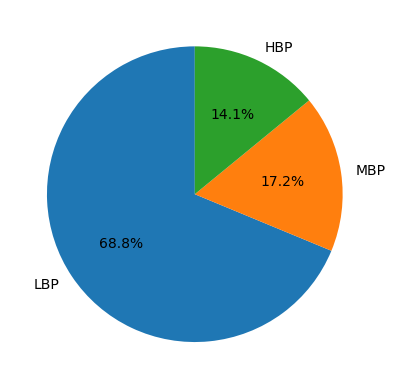

In [7]:
#Percentage of conditions(CLabel) observed in samples

plt.pie(Data["CLabel"].value_counts(), labels = ("LBP","MBP","HBP"), autopct = '%1.1f%%', startangle = 90)
plt.show()

# Train Test Split

In [8]:
# features (Data.drop(columns="CLabel")) and labels (Data["CLabeln"])
# test_size=0.2 means 20% of the data is used for testing, and 80% for training
# random_state ensures reproducibility of the split
#stratify=Data["CLabel"]: Ensures that the train and test sets have the same proportion of class labels as in the original data.

X_train, X_test, y_train, y_test = train_test_split(Data.drop(columns="CLabel"),
                                                    Data["CLabel"],
                                                    test_size=0.2,
                                                    random_state = 42, 
                                                    stratify=Data["CLabel"])

In [9]:
C_train, C_test, d_train, d_test = train_test_split(Data_v.drop(columns="CLabel"),
                                                    Data_v["CLabel"],
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify = Data_v["CLabel"])

# KNN Algorithm

### Applying KNN on differentially expressed genes

Cross-validation scores: [0.375      0.625      0.57142857 0.71428571 0.85714286 0.85714286
 0.85714286]
7-Fold average cross-validation score: 0.6938775510204082
KAccuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.82         9
         MBP       1.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.90      0.33      0.27        13
weighted avg       0.79      0.69      0.57        13


Confusion Matrix:
 [[0 2 0]
 [0 9 0]
 [0 2 0]]


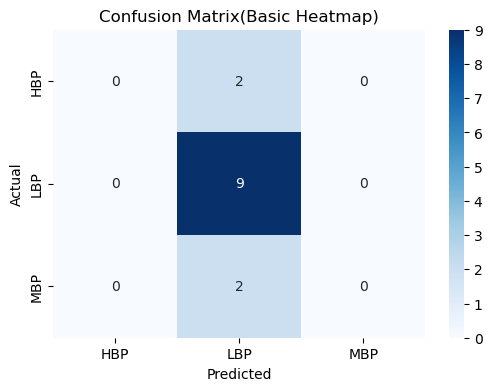

In [102]:
# Initialize the KNN model with a chosen number of neighbors, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

#Cross-validation helps to ensure the model isn't overfitting or underfitting by testing on multiple subsets of the data. This way, you can better understand the model's performance on unseen data.
# Perform 7-fold cross-validation using StratifiedKFold to ensure balanced splits
# cross validation means the dataset is split into 7 parts, and the model is trained and evaluated 7 times, each time using a different fold as the test set.
knn_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=knn_cv, scoring='accuracy')

#7-Fold Cross-Validation scores
print(f"Cross-validation scores: {knn_cv_scores}")

# 7-Fold average cross-validation score(gives the average accuracy across all folds.)
print(f"7-Fold average cross-validation score: {knn_cv_scores.mean()}")

# Evaluate the model :Accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KAccuracy: {knn_accuracy}')


# Generate the classification report
print("\nClassification Report:\n", classification_report(y_test, knn_y_pred,zero_division=1))

#The zero_division parameter can take the following values:
# 0: Set precision or recall to 0 for labels with no predicted samples.
# 1: Set precision or recall to 1 for labels with no predicted samples.

# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("\nConfusion Matrix:\n", knn_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
# plt.imshow(knn_cm, cmap='Blues', interpolation='nearest')  #his line plots a heatmap using the knn_cm, with the color map set to 'Blues' and no smoothing (each data point is represented as a distinct block of color without any blending).
# plt.xticks(ticks=range(len(knn.classes_)), labels=knn.classes_, rotation=45)  # x-axis labels
# plt.yticks(ticks=range(len(knn.classes_)), labels=knn.classes_)  # y-axis labels
# plt.colorbar()
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_) #creates a heatmap of the confusion matrix knn_cm, displaying integer annotations inside the cells (annot=True, fmt='d'), using the 'Blues' color map, and setting the x-axis and y-axis labels with the predicted and actual class names from knn.classes_.
plt.title('Confusion Matrix(Basic Heatmap)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### Hyperparameter tuning

Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Score: 0.7295918367346939
Accuracy of the tuned KNN model: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.82         9
         MBP       1.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.90      0.33      0.27        13
weighted avg       0.79      0.69      0.57        13


Confusion Matrix:
 [[0 2 0]
 [0 9 0]
 [0 2 0]]


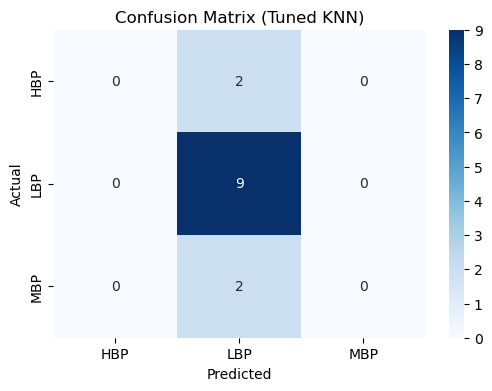

In [23]:
#hyper-parameter tuning

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Tuning number of neighbors
    'weights': ['uniform', 'distance']  # Tuning weighting method
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Set up 7-fold cross-validation using StratifiedKFold
knn_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Use GridSearchCV to find the best parameters for KNN
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=knn_cv, scoring='accuracy', n_jobs=-1)  
#n_jobs=1 (default) would mean only one core is used, running the computation sequentially, n_jobs=2 (or any positive integer) limits the computation to that number of cores.
grid_search.fit(X_train, y_train)

# Best parameters and best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the final KNN model with the best parameters
best_knn = grid_search.best_estimator_

# Make predictions on the test set using the tuned model
knn_y_pred = best_knn.predict(X_test)

# Evaluate accuracy of the tuned model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'Accuracy of the tuned KNN model: {knn_accuracy}')

# Generate classification report for the tuned model
print("\nClassification Report:\n", classification_report(y_test, knn_y_pred, zero_division=1))

# Confusion Matrix for the tuned model
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("\nConfusion Matrix:\n", knn_cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix (Tuned KNN)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### Applying KNN on VST normalized genes(raw counts)

Cross-validation scores: [0.57142857 0.71428571 0.71428571 0.71428571 0.71428571 0.57142857
 0.66666667]
7-Fold average cross-validation score: 0.6666666666666667
KAccuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.67      0.91      0.77        11
         MBP       0.00      0.00      0.00         3

    accuracy                           0.62        16
   macro avg       0.56      0.30      0.26        16
weighted avg       0.58      0.62      0.53        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 10  1]
 [ 0  3  0]]


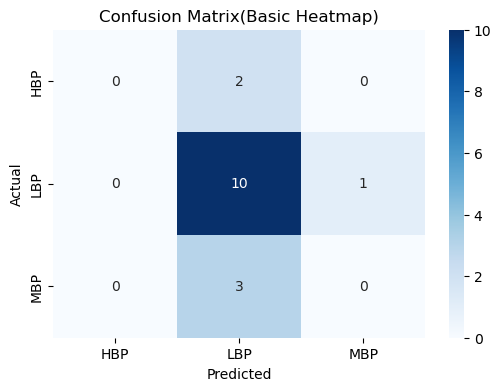

In [15]:
# Initialize the KNN model with a chosen number of neighbors, e.g., 5
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model on the training set
knn.fit(C_train, d_train)

# Make predictions on the test set
knn_d_pred = knn.predict(C_test)

#Cross-validation helps to ensure the model isn't overfitting or underfitting by testing on multiple subsets of the data. This way, you can better understand the model's performance on unseen data.
# Perform 7-fold cross-validation using StratifiedKFold to ensure balanced splits
# cross validation means the dataset is split into 7 parts, and the model is trained and evaluated 7 times, each time using a different fold as the test set.
knn_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(knn, C_train, d_train, cv=knn_cv, scoring='accuracy')

#7-Fold Cross-Validation scores
print(f"Cross-validation scores: {knn_cv_scores}")

# 7-Fold average cross-validation score(gives the average accuracy across all folds.)
print(f"7-Fold average cross-validation score: {knn_cv_scores.mean()}")

# Evaluate the model :Accuracy
knn_accuracy = accuracy_score(d_test, knn_d_pred)
print(f'KAccuracy: {knn_accuracy}')


# Generate the classification report
print("\nClassification Report:\n", classification_report(d_test, knn_d_pred,zero_division=1))

#The zero_division parameter can take the following values:
# 0: Set precision or recall to 0 for labels with no predicted samples.
# 1: Set precision or recall to 1 for labels with no predicted samples.

# Confusion Matrix
knn_cm = confusion_matrix(d_test, knn_d_pred)
print("\nConfusion Matrix:\n", knn_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
# plt.imshow(knn_cm, cmap='Blues', interpolation='nearest')  #his line plots a heatmap using the knn_cm, with the color map set to 'Blues' and no smoothing (each data point is represented as a distinct block of color without any blending).
# plt.xticks(ticks=range(len(knn.classes_)), labels=knn.classes_, rotation=45)  # x-axis labels
# plt.yticks(ticks=range(len(knn.classes_)), labels=knn.classes_)  # y-axis labels
# plt.colorbar()
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_) #creates a heatmap of the confusion matrix knn_cm, displaying integer annotations inside the cells (annot=True, fmt='d'), using the 'Blues' color map, and setting the x-axis and y-axis labels with the predicted and actual class names from knn.classes_.
plt.title('Confusion Matrix(Basic Heatmap)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### Hyperparameter tuning

Best Parameters: {'n_neighbors': 13, 'weights': 'uniform'}
Best Cross-Validation Score: 0.6870748299319729
Accuracy of the tuned KNN model: 0.6875

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.81        11
         MBP       1.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.90      0.33      0.27        16
weighted avg       0.79      0.69      0.56        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  3  0]]


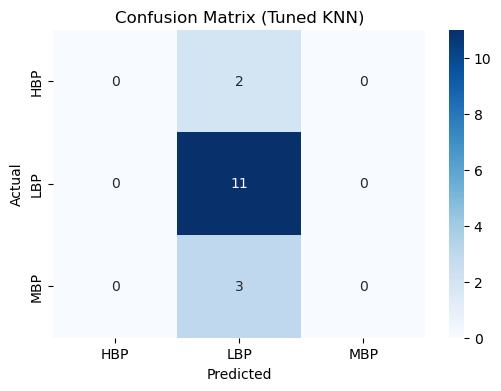

In [16]:
#hyper parameter tuning

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Various options for neighbors
    'weights': ['uniform', 'distance']        # Weighting methods
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Set up 7-fold cross-validation
knn_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=knn_cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(C_train, d_train)

# Display the best parameters and best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the final model with the best parameters
best_knn = grid_search.best_estimator_

# Predict using the tuned model
knn_d_pred = best_knn.predict(C_test)

# Evaluate accuracy of the tuned model
knn_accuracy = accuracy_score(d_test, knn_d_pred)
print(f'Accuracy of the tuned KNN model: {knn_accuracy}')

# Classification report
print("\nClassification Report:\n", classification_report(d_test, knn_d_pred, zero_division=1))

# Confusion Matrix
knn_cm = confusion_matrix(d_test, knn_d_pred)
print("\nConfusion Matrix:\n", knn_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix (Tuned KNN)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Support Vector Machine

### Applying SVM on differentially expressed genes


Results for Linear SVM:
Cross-validation scores: [0.625      0.5        0.57142857 0.71428571 0.71428571 0.57142857
 0.85714286]
7-Fold average cross-validation score: 0.6505102040816325
Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       0.00      0.00      0.00         2
         LBP       0.89      0.89      0.89         9
         MBP       0.50      0.50      0.50         2

    accuracy                           0.69        13
   macro avg       0.46      0.46      0.46        13
weighted avg       0.69      0.69      0.69        13


Confusion Matrix:
 [[0 1 1]
 [1 8 0]
 [1 0 1]]


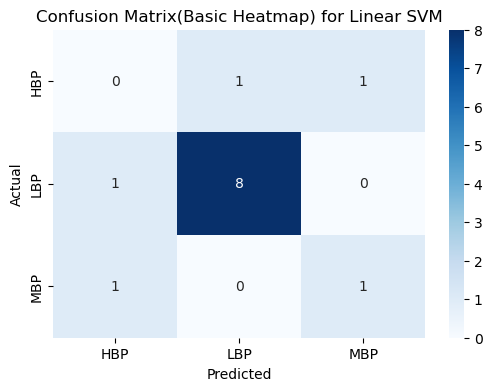


Results for RBF SVM:
Cross-validation scores: [0.375      0.625      0.57142857 0.57142857 0.57142857 0.28571429
 0.71428571]
7-Fold average cross-validation score: 0.5306122448979592
Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       0.50      0.50      0.50         2
         LBP       1.00      0.67      0.80         9
         MBP       0.40      1.00      0.57         2

    accuracy                           0.69        13
   macro avg       0.63      0.72      0.62        13
weighted avg       0.83      0.69      0.72        13


Confusion Matrix:
 [[1 0 1]
 [1 6 2]
 [0 0 2]]


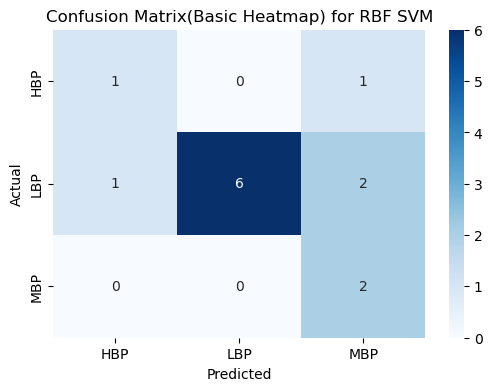

In [105]:
# Define the different SVM models
# initialize two Support Vector Classifiers: one with a linear kernel and the other with a radial basis function (RBF) kernel, both using balanced class weights to handle class imbalances and a fixed random seed for reproducibility
svm_linear = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# List of models to iterate over
svm_models = {
    'Linear SVM': svm_linear,
    'RBF SVM': svm_rbf
}

# Perform 7-fold cross-validation using StratifiedKFold
svm_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)


for name, model in svm_models.items():
    print(f"\nResults for {name}:")

    # Perform cross-validation
    svm_cv_scores = cross_val_score(model, X_train, y_train, cv=svm_cv, scoring='accuracy')

    #7-Fold Cross-Validation scores
    print(f"Cross-validation scores: {svm_cv_scores}")

    # 7-Fold average cross-validation score(gives the average accuracy across all folds.)
    print(f"7-Fold average cross-validation score: {svm_cv_scores.mean()}")
    
    # Train the SVM model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    svm_y_pred = model.predict(X_test)
    
    # Evaluate the model: Accuracy
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    print(f'Accuracy: {svm_accuracy}')
    
    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, svm_y_pred,zero_division=1))
    
    # Confusion Matrix
    svm_cm = confusion_matrix(y_test, svm_y_pred)
    print("\nConfusion Matrix:\n", svm_cm)
    
    # Visualizing the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix(Basic Heatmap) for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    


### Hyperparameter Tuning


Results for Linear SVM:
Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.6505102040816325
Accuracy of Linear SVM with tuned parameters: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       0.00      0.00      0.00         2
         LBP       0.89      0.89      0.89         9
         MBP       0.50      0.50      0.50         2

    accuracy                           0.69        13
   macro avg       0.46      0.46      0.46        13
weighted avg       0.69      0.69      0.69        13


Confusion Matrix:
 [[0 1 1]
 [1 8 0]
 [1 0 1]]


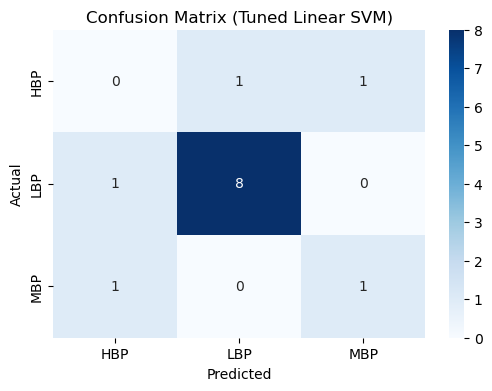


Results for RBF SVM:
Best Parameters: {'C': 1, 'gamma': 0.001}
Best Cross-Validation Score: 0.6887755102040817
Accuracy of RBF SVM with tuned parameters: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.82         9
         MBP       1.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.90      0.33      0.27        13
weighted avg       0.79      0.69      0.57        13


Confusion Matrix:
 [[0 2 0]
 [0 9 0]
 [0 2 0]]


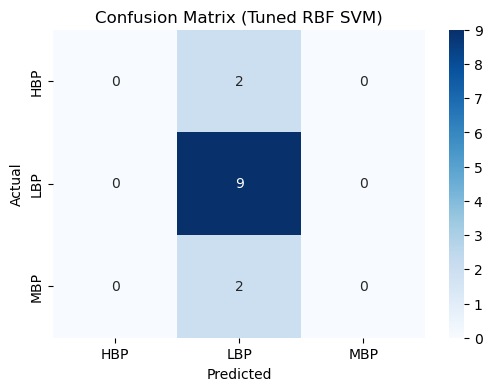

In [18]:
#hyper parameter tuning

# Define parameter grids for each SVM model
param_grid_linear = {
    'C': [0.1, 1, 10, 100]  # Regularization parameter
}
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient for RBF kernel
}

# Define the SVM models with the parameter grids
svm_models = {
    'Linear SVM': (SVC(kernel='linear', class_weight='balanced', random_state=42), param_grid_linear),
    'RBF SVM': (SVC(kernel='rbf', class_weight='balanced', random_state=42), param_grid_rbf)
}

# Perform 7-fold cross-validation using StratifiedKFold
svm_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Iterate over each model and perform GridSearchCV
for name, (model, param_grid) in svm_models.items():
    print(f"\nResults for {name}:")

    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=svm_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and cross-validation score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score}")

    # Train the final model with the best parameters
    best_svm = grid_search.best_estimator_

    # Make predictions on the test set
    svm_y_pred = best_svm.predict(X_test)

    # Evaluate model accuracy
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    print(f'Accuracy of {name} with tuned parameters: {svm_accuracy}')

    # Generate classification report
    print("\nClassification Report:\n", classification_report(y_test, svm_y_pred, zero_division=1))

    # Confusion Matrix
    svm_cm = confusion_matrix(y_test, svm_y_pred)
    print("\nConfusion Matrix:\n", svm_cm)

    # Visualizing the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
    plt.title(f'Confusion Matrix (Tuned {name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Applying SVM on VST normalized genes


Results for Linear SVM:
Cross-validation scores: [0.57142857 0.71428571 0.57142857 0.57142857 0.85714286 0.71428571
 0.66666667]
7-Fold average cross-validation score: 0.6666666666666667
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.73      1.00      0.85        11
         MBP       1.00      0.33      0.50         3

    accuracy                           0.75        16
   macro avg       0.91      0.44      0.45        16
weighted avg       0.82      0.75      0.68        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  2  1]]


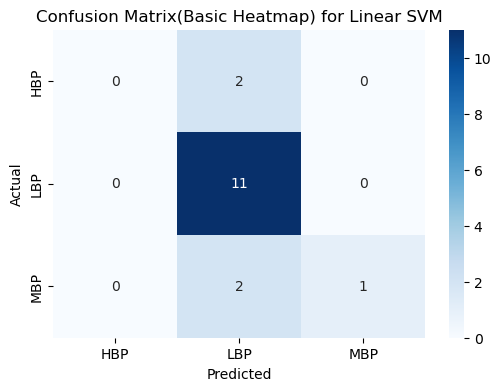


Results for RBF SVM:
Cross-validation scores: [0.85714286 0.28571429 0.28571429 0.57142857 0.57142857 0.57142857
 0.5       ]
7-Fold average cross-validation score: 0.520408163265306
Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       1.00      0.64      0.78        11
         MBP       0.33      1.00      0.50         3

    accuracy                           0.62        16
   macro avg       0.78      0.55      0.43        16
weighted avg       0.88      0.62      0.63        16


Confusion Matrix:
 [[0 0 2]
 [0 7 4]
 [0 0 3]]


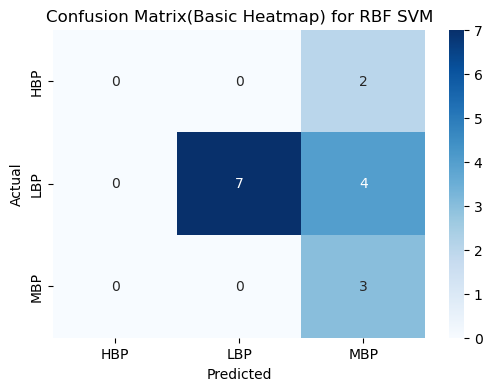

In [19]:
# Define the different SVM models
# initialize two Support Vector Classifiers: one with a linear kernel and the other with a radial basis function (RBF) kernel, both using balanced class weights to handle class imbalances and a fixed random seed for reproducibility
svm_linear = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# List of models to iterate over
svm_models = {
    'Linear SVM': svm_linear,
    'RBF SVM': svm_rbf
}

# Perform 7-fold cross-validation using StratifiedKFold
svm_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)


for name, model in svm_models.items():
    print(f"\nResults for {name}:")

    # Perform cross-validation
    svm_cv_scores = cross_val_score(model, C_train, d_train, cv=svm_cv, scoring='accuracy')

    #7-Fold Cross-Validation scores
    print(f"Cross-validation scores: {svm_cv_scores}")

    # 7-Fold average cross-validation score(gives the average accuracy across all folds.)
    print(f"7-Fold average cross-validation score: {svm_cv_scores.mean()}")
    
    # Train the SVM model
    model.fit(C_train, d_train)
    
    # Make predictions on the test set
    svm_d_pred = model.predict(C_test)
    
    # Evaluate the model: Accuracy
    svm_accuracy = accuracy_score(d_test, svm_d_pred)
    print(f'Accuracy: {svm_accuracy}')
    
    # Generate the classification report
    print("\nClassification Report:\n", classification_report(d_test, svm_d_pred,zero_division=1))
    
    # Confusion Matrix
    svm_cm = confusion_matrix(d_test, svm_d_pred)
    print("\nConfusion Matrix:\n", svm_cm)
    
    # Visualizing the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix(Basic Heatmap) for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    


### Hyperparameter tuning


Results for Linear SVM:
Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.6666666666666667
Accuracy of Linear SVM with tuned parameters: 0.75

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.73      1.00      0.85        11
         MBP       1.00      0.33      0.50         3

    accuracy                           0.75        16
   macro avg       0.91      0.44      0.45        16
weighted avg       0.82      0.75      0.68        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  2  1]]


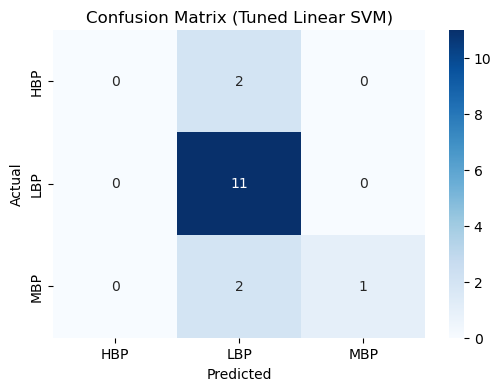


Results for RBF SVM:
Best Parameters: {'C': 1, 'gamma': 0.001}
Best Cross-Validation Score: 0.6870748299319729
Accuracy of RBF SVM with tuned parameters: 0.6875

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.81        11
         MBP       1.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.90      0.33      0.27        16
weighted avg       0.79      0.69      0.56        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  3  0]]


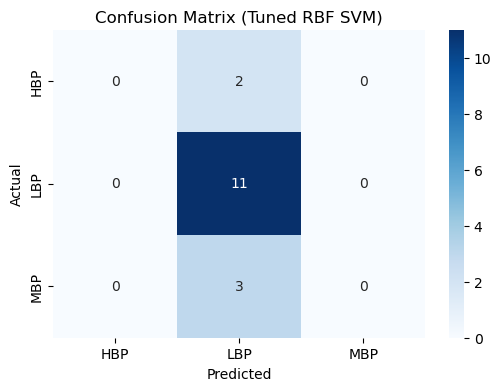

In [20]:
#hyper parameter tuning

# Define parameter grids for each SVM model
param_grid_linear = {
    'C': [0.1, 1, 10, 100]  # Regularization parameter for linear SVM
}
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter for RBF SVM
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient for RBF kernel
}

# Define the SVM models with the parameter grids
svm_models = {
    'Linear SVM': (SVC(kernel='linear', class_weight='balanced', random_state=42), param_grid_linear),
    'RBF SVM': (SVC(kernel='rbf', class_weight='balanced', random_state=42), param_grid_rbf)
}

# Perform 7-fold cross-validation using StratifiedKFold
svm_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Iterate over each model and perform GridSearchCV
for name, (model, param_grid) in svm_models.items():
    print(f"\nResults for {name}:")

    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=svm_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(C_train, d_train)

    # Get the best parameters and cross-validation score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score}")

    # Train the final model with the best parameters
    best_svm = grid_search.best_estimator_

    # Make predictions on the test set
    svm_d_pred = best_svm.predict(C_test)

    # Evaluate model accuracy
    svm_accuracy = accuracy_score(d_test, svm_d_pred)
    print(f'Accuracy of {name} with tuned parameters: {svm_accuracy}')

    # Generate classification report
    print("\nClassification Report:\n", classification_report(d_test, svm_d_pred, zero_division=1))

    # Confusion Matrix
    svm_cm = confusion_matrix(d_test, svm_d_pred)
    print("\nConfusion Matrix:\n", svm_cm)

    # Visualizing the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
    plt.title(f'Confusion Matrix (Tuned {name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Random Forest

### Applying RF on differentially expressed genes

Cross-validation scores: [0.625      0.625      0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571]
7-Fold average cross-validation score: 0.6887755102040817
Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.82         9
         MBP       1.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.90      0.33      0.27        13
weighted avg       0.79      0.69      0.57        13


Confusion Matrix:
 [[0 2 0]
 [0 9 0]
 [0 2 0]]


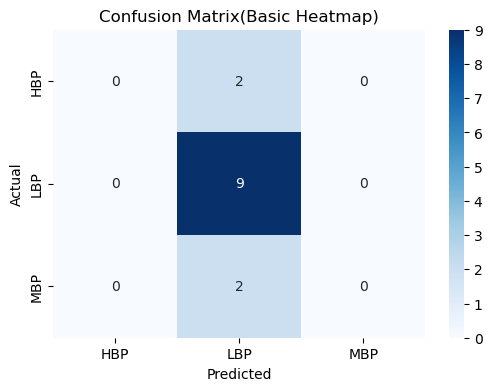

In [106]:
# Create a Random Forest classifier
#initializes a Random Forest classifier with 100 trees, a fixed random seed for reproducibility, and balanced class weights to address any class imbalance in the dataset(otherwise we may get high accuracey,for imbalanced dataset)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)

# Perform 7-fold cross-validation using StratifiedKFold to ensure balanced splits
rf_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=rf_cv, scoring='accuracy')

#7-Fold Cross-Validation scores
print(f"Cross-validation scores: {rf_cv_scores}")

# 7-Fold average cross-validation score(gives the average accuracy across all folds.)
print(f"7-Fold average cross-validation score: {rf_cv_scores.mean()}")

# Evaluate the model : Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Accuracy: {rf_accuracy}')

# Generate the classification report
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred,zero_division=1))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("\nConfusion Matrix:\n", rf_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix(Basic Heatmap)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    


### Hyperparameter tuning

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.6887755102040817
Accuracy of Random Forest with tuned parameters: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.82         9
         MBP       1.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.90      0.33      0.27        13
weighted avg       0.79      0.69      0.57        13


Confusion Matrix:
 [[0 2 0]
 [0 9 0]
 [0 2 0]]


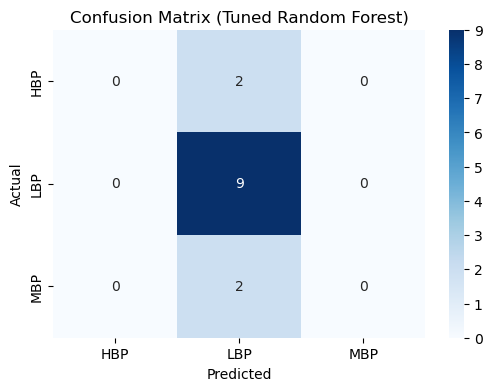

In [21]:
#hyper parameter tuning

# Define parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier with balanced class weights and a fixed random state
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform 7-fold cross-validation using StratifiedKFold
rf_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# GridSearchCV to perform hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=rf_cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score from cross-validation
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Score: {best_score_rf}")

# Train the Random Forest model with best parameters
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
rf_y_pred = best_rf.predict(X_test)

# Evaluate the model: Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Accuracy of Random Forest with tuned parameters: {rf_accuracy}')

# Generate the classification report
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred, zero_division=1))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("\nConfusion Matrix:\n", rf_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Applying RF on VST normalized genes

Cross-validation scores: [0.57142857 0.85714286 0.57142857 0.57142857 0.85714286 0.71428571
 0.66666667]
7-Fold average cross-validation score: 0.6870748299319728
Accuracy: 0.6875

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.81        11
         MBP       1.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.90      0.33      0.27        16
weighted avg       0.79      0.69      0.56        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  3  0]]


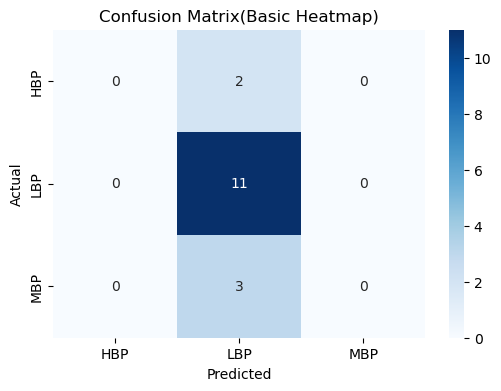

In [18]:
# Create a Random Forest classifier
#initializes a Random Forest classifier with 100 trees, a fixed random seed for reproducibility, and balanced class weights to address any class imbalance in the dataset(otherwise we may get high accuracey,for imbalanced dataset)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

# Train the classifier
rf.fit(C_train, d_train)

# Make predictions
rf_d_pred = rf.predict(C_test)

# Perform 7-fold cross-validation using StratifiedKFold to ensure balanced splits
rf_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, C_train, d_train, cv=rf_cv, scoring='accuracy')

#7-Fold Cross-Validation scores
print(f"Cross-validation scores: {rf_cv_scores}")

# 7-Fold average cross-validation score(gives the average accuracy across all folds.)
print(f"7-Fold average cross-validation score: {rf_cv_scores.mean()}")

# Evaluate the model : Accuracy
rf_accuracy = accuracy_score(d_test, rf_d_pred)
print(f'Accuracy: {rf_accuracy}')

# Generate the classification report
print("\nClassification Report:\n", classification_report(d_test, rf_d_pred,zero_division=1))

# Confusion Matrix
rf_cm = confusion_matrix(d_test, rf_d_pred)
print("\nConfusion Matrix:\n", rf_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix(Basic Heatmap)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    


### Hyperparameter tuning

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.7074829931972789
Accuracy of Random Forest with tuned parameters: 0.6875

Classification Report:
               precision    recall  f1-score   support

         HBP       1.00      0.00      0.00         2
         LBP       0.69      1.00      0.81        11
         MBP       1.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.90      0.33      0.27        16
weighted avg       0.79      0.69      0.56        16


Confusion Matrix:
 [[ 0  2  0]
 [ 0 11  0]
 [ 0  3  0]]


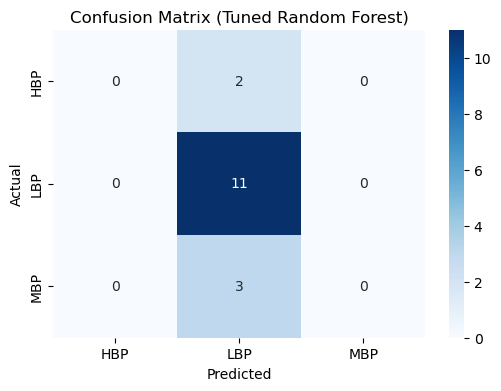

In [22]:
#hyper parameter tuning


# Define the parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier with balanced class weights and a fixed random state
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform 7-fold cross-validation using StratifiedKFold
rf_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# GridSearchCV to perform hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=rf_cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(C_train, d_train)

# Best parameters and best score from cross-validation
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Score: {best_score_rf}")

# Train the Random Forest model with the best parameters
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
rf_d_pred = best_rf.predict(C_test)

# Evaluate the model: Accuracy
rf_accuracy = accuracy_score(d_test, rf_d_pred)
print(f'Accuracy of Random Forest with tuned parameters: {rf_accuracy}')

# Generate the classification report
print("\nClassification Report:\n", classification_report(d_test, rf_d_pred, zero_division=1))

# Confusion Matrix
rf_cm = confusion_matrix(d_test, rf_d_pred)
print("\nConfusion Matrix:\n", rf_cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()